# MNIST Handwritten Digit Classification DataSet



> - Goal of this notebook is to classify handwritten digits to the corressponding numerical value


> We will be using PCA to reduce the dimensionality of the dataset then use Support Vector Classifier(SVC) to classify our test set. We will lastly Try a LDA and QDA models on  it and compare our findings





In [6]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%cd /content/drive/My Drive/MLtermProj/DigitDataSet
%pwd
%ls

/content/drive/My Drive/MLtermProj/DigitDataSet
FaheemOmar_Dataset3.ipynb  test.csv  train.csv


In [9]:
traindf= pd.read_csv('train.csv')


### **A) *Brief Exploration of Dataset***

In [10]:
print('Train:',traindf.head())


Train:    label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


The Shape and General aspects of our dataset

In [11]:
print('Training set shape:', traindf.shape,'\n')

print(traindf.columns)
print(traindf.describe())


Training set shape: (42000, 785) 

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
              label   pixel0   pixel1  ...  pixel781  pixel782  pixel783
count  42000.000000  42000.0  42000.0  ...   42000.0   42000.0   42000.0
mean       4.456643      0.0      0.0  ...       0.0       0.0       0.0
std        2.887730      0.0      0.0  ...       0.0       0.0       0.0
min        0.000000      0.0      0.0  ...       0.0       0.0       0.0
25%        2.000000      0.0      0.0  ...       0.0       0.0       0.0
50%        4.000000      0.0      0.0  ...       0.0       0.0       0.0
75%        7.000000      0.0      0.0  ...       0.0       0.0       0.0
max        9.000000      0.0      0.0  ...       0.0       0.0       0.0

[8 rows x 785 

We can see that we have 42,000 sample images aling with 784 attributes that coresspond to a pixel. 

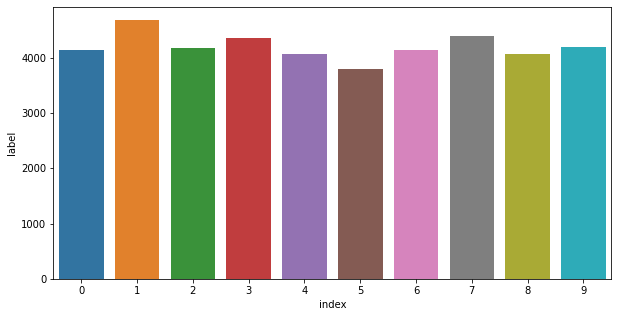

In [12]:
countTable = traindf.label.value_counts()
countTable = countTable.reset_index().sort_values(by='label')
plt.figure(figsize=(10, 5))
sns.barplot(x='index', y='label', data=countTable)

This bar plot shows the distribution of the number of each digit is in the training dataset

In [13]:
traindf.duplicated().sum()
traindf.isna().sum()
traindf.isnull().sum()


label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

We see that there are no duplicates or NANS in this dataset

### **B & C) *Pre Processing of DataSet and Feature Extraction***

- After our exploratory analysis we see that this dataset is already fairly well preproccessed for us
-  Now all we have to do is continue to our feature extraction using PCA

we separate our test adn training splits with the sk learn function where our test set will be 25% of the data set and randomly selected

In [14]:
## first we separate our training set and its labels

trainX= traindf.drop('label',axis=1)
trainY= traindf['label']
#scaling for PCA (mean centering)
Xscaled= scale(trainX)

Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled, trainY, test_size = 0.25, random_state = 101)

We now instantiate our pca module in order to further investigate what we should reduce to

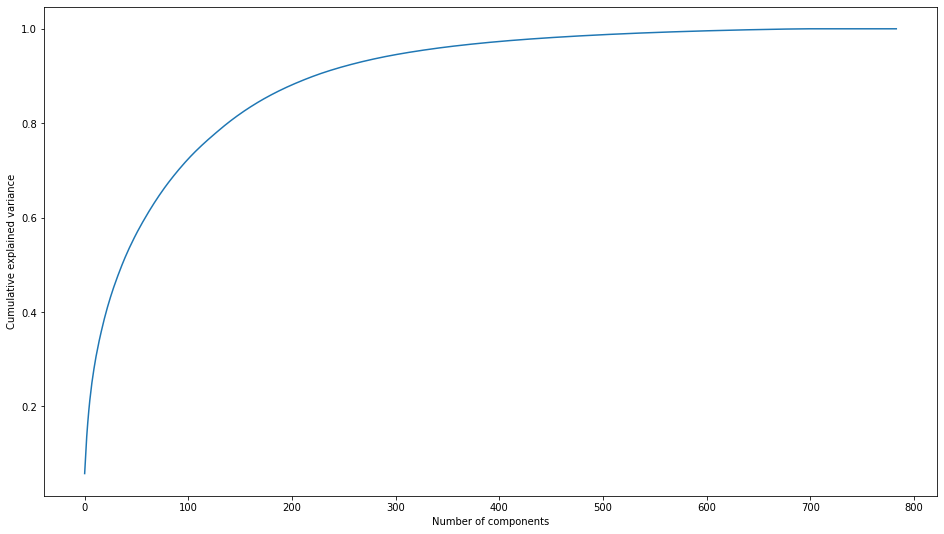

In [15]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(Xtrain)

fig = plt.figure(figsize = (16,9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

This cumalative explained ratio converges when the number of principal compenents is 400. This convergences shows the information or energy of dataset is retained at a certain number of principal components

We now begin our model by creating a pca object with 400 components

In [16]:
model= PCA(n_components=400 )
X_train = model.fit_transform(Xtrain)
X_test = model.transform(Xtest)

print('Training set new shape:', X_train.shape)

Training set new shape: (31500, 400)


### **D) Processing of each dataset(SVC, LDA, QDA)**

With our test and training datasets alotted we begin with our SVC model
which by default uses the radial basis function as the kernel

In [17]:
svc= SVC()

svc.fit(X_train, ytrain)
y_pred = svc.predict(X_test)

# metrics
outVa = svc.score(X_test, ytest)
print('SVC Score: {:.2%}'.format(outVa))

SVC Score: 96.02%


Here we can see that the SVC performs very well with a 96% accuracy score

In [22]:
print('SVC F1 Score : ')
print(f1_score(ytest, y_pred , average=None).mean())


SVC F1 Score : 
0.9602289723913024


QDA model

Below you can see the QDA models implementation and performance on the dataset given with a 78% accuracy rate

In [20]:
qda = QDA()
qda.fit(X_train, ytrain)
    #Compute classification error
outVals = qda.score(X_test, ytest)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(qda, X_train, ytrain, scoring='accuracy', cv=cv, n_jobs=-1).mean()
print(' Cross Validation score ', scores)
print('QDA Score: {:.2%}'.format(outVals))
print('QDA F1 Score : ')
print(f1_score(ytest, qda.predict(X_test) , average=None).mean())

 Cross Validation score  0.7834920634920636
QDA Score: 78.12%
QDA F1 Score : 
0.7847953808606832


LDA Model

Below you can see the QDA models implementation and performance on the dataset given with a 86% accuracy rate that correspond to the k=10 fold cross validation sore

In [24]:
lda = LDA()
lda.fit(X_train, ytrain)
    #Compute classification error
outVal = lda.score(X_test, ytest)
print('LDA Score: {:.2%}'.format(outVal))
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(lda, X_train, ytrain, scoring='accuracy', cv=cv, n_jobs=-1).mean()
print(' Cross Validation score ', scores,'\n')
print('LDA F1 Score : ')
print(f1_score(ytest, lda.predict(X_test) , average=None).mean())

LDA Score: 86.50%
 Cross Validation score  0.8649206349206349 

LDA F1 Score : 
0.864303935936098


All three of a models are not dependent on parameters which allows them to avoid parameter tuning past this level

### **E) Comparative analysis of the three methods on the dataset**

After analysis on the metrics shown above we can see that the SVC with an rbf kernel performs the best with an accuracy of 96% out performing the LDA and QDA models in classification purposes. 

In [25]:
##SVC
# confusion matrix
print('SVC confusion Matrix')
print(confusion_matrix(ytest, svc.predict(X_test), labels=[0, 1, 2,3,4,5,6,7,8,9]),'\n')

## QDA
print('QDA confusion Matrix')
print(confusion_matrix(ytest, qda.predict(X_test), labels=[0, 1, 2,3,4,5,6,7,8,9]),'\n')

##LDA
print('LDA confusion Matrix')
print(confusion_matrix(ytest, lda.predict(X_test), labels=[0, 1, 2,3,4,5,6,7,8,9]))

SVC confusion Matrix
[[ 985    0    5    1    2    3    5    0    4    0]
 [   0 1133    9    3    3    0    1    1    3    1]
 [   3    3 1025    6    6    1    2    6    6    1]
 [   1    4   18 1023    2    7    0    8   14    5]
 [   2    1    9    0  995    3    3    5    1    9]
 [   2    1   10   15    1  909    8    0    5    1]
 [   2    4   10    1    3    9  994    0    0    0]
 [   1    1   18    3   12    2    0 1042    0   13]
 [   1    3    9    4   11    9    6    4  961    2]
 [   2    3   15    9   20    1    0   22    8 1015]] 

QDA confusion Matrix
[[953   0  18   8   0   3   6   1  16   0]
 [  2 971  12   9   3   3  16   0 130   8]
 [ 42   2 749 101  11   2  16   3 130   3]
 [ 37   1  12 771   2   7   2  10 224  16]
 [  9   0  14   7 749   4   9  10  83 143]
 [ 46   0  12  60   2 552  11   0 258  11]
 [ 20   1  14   3   0  15 933   0  37   0]
 [  0   0  10  19  21   2   0 623  22 395]
 [ 19   1  16  16  10  12   4   4 920   8]
 [  7   0   5   7  29   1   0  30  34 

Even after further inspection of the confusion matrices it is evident that the SVC model performs the best in this case. The linear models that are the SVC and LDA performed better on this data set than the non linear QDA. Computationally the SVC model took the longest

### **F) Ethical Issues with Task**

In this instance it is hard to see how this could be an ethically compromising ordeal. I guess in extreme circumstances that perhaps a hacked survielince camera could spy and transcribe what you write and keep tabs on you. This case is your classic black mirror horror story. A broader ethical implication could be the use of such image classifier models on humans or faces in general. There are fears of ml software being used to classify a 'criminal' which would inherently be much more skewed and biased to people of color.

### **G) Bibliography**

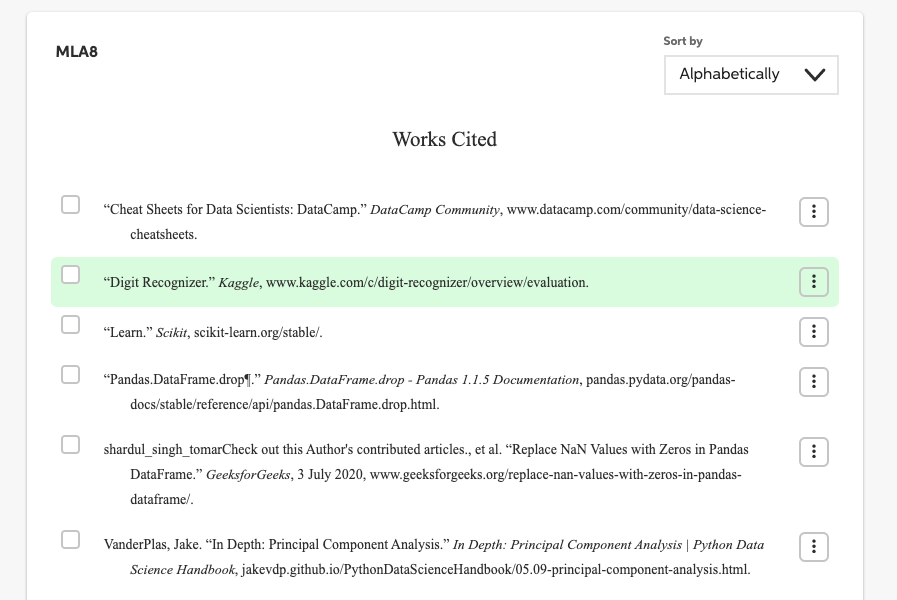